#### train → Test → Predict → Evaluate → Deploy → Dominate

In [27]:
import pandas as pd
import matplotlib.pyplot as pt
import numpy as np
# This line is used in Jupyter Notebooks to make your plots show up directly below the code 
%matplotlib inline    

In [28]:
df=pd.read_csv('height-weight.csv')

In [29]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


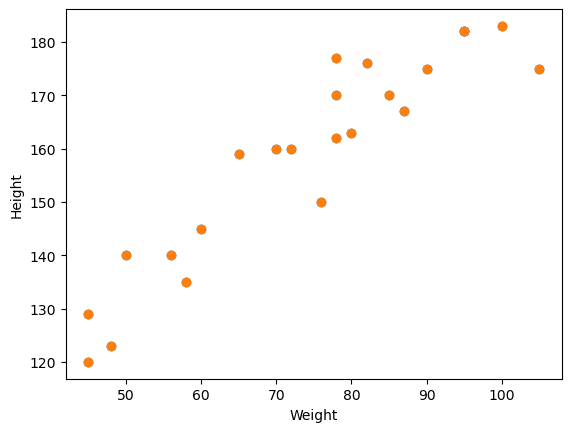

In [33]:
pt.scatter(df['Weight'], df['Height'])
pt.xlabel('Weight')
pt.ylabel('Height')
pt.show()


In [7]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [35]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)


In [ ]:
## Independent and dependent features
x = df[['Weight']]   ### independent features should be data frame or 2 dimesnionalarray
y = df['Height']  ## this variiable can be in series or 1d array

In [15]:
X_series=df['Weight']
np.array(X_series).shape

(23,)

In [16]:
np.array(y).shape

(23,)

In [60]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [14]:
x = df[['Weight']]
y = df['Height']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
## Standardization

from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)


In [17]:
X_test=scaler.transform(X_test)

In [18]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

#### Model training starts.. 

simple linear regressio is applied

In [ ]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [20]:
regression = LinearRegression(n_jobs = -1)

In [21]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [22]:
print("cofficient: ",regression.coef_)
print("intercept: ",regression.intercept_)

cofficient:  [17.2982057]
intercept:  156.47058823529412


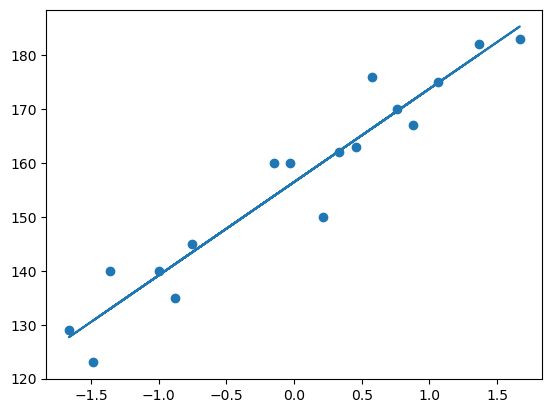

In [37]:
## plot Training data plot best fit line
pt.scatter(X_train,y_train)
pt.plot(X_train,regression.predict(X_train))
pt.show()

### testing the model
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =156.470 + 17.29(X_test)

In [38]:
## Prediction for test data
y_pred = regression.predict(X_test)

#### checking performance

In [58]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
mse=mean_squared_error(y_test,y_pred)   # lower = better
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


114.84069295228699
9.665125886795005
10.716374991212605


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [41]:
from sklearn.metrics import r2_score

In [ ]:
score=r2_score(y_test,y_pred)   # closer to 1 = better
print(score)

0.7360826717981276


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [43]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

#### This is OSL method to implement simple linear regression

In [ ]:
## OLS Linear Regression

import statsmodels.api as sm

In [45]:

model = sm.OLS(y_train,X_train).fit()

In [50]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [51]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 07 Jun 2025   Prob (F-statistic):                       0.664
Time:                        01:01:49   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\Anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


#### prediction of new data

while you perform prediction of new data, keep in mind that that you need to pass the datapoint as dataframe/ 2d array and you need to standardise it usingscaler.transform

In [57]:
## Prediction For new data
regression.predict(scaler.transform([[72]]))

regression.predict(scaler.transform([[50]]))

d:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([132.92309646])